In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

from mpl_toolkits.axes_grid1 import make_axes_locatable
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.neighbors import DistanceMetric
from math import radians

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn import metrics


from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('df_new.csv', sep=',') 
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,temp3pm,raintoday,raintomorrow,year,month,day,latitude,longitude,climat_koppen,climat
0,2008-12-01,Albury,13.4,22.9,0.6,7.6,10.9,W,44.0,W,...,21.8,No,No,2008,12,1,-36.065766,146.910315,Cfa,chaud_humide
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.9,WNW,44.0,NNW,...,24.3,No,No,2008,12,2,-36.065766,146.910315,Cfa,chaud_humide
2,2008-12-03,Albury,12.9,25.7,0.0,8.0,8.0,WSW,46.0,W,...,23.2,No,No,2008,12,3,-36.065766,146.910315,Cfa,chaud_humide
3,2008-12-04,Albury,9.2,28.0,0.0,10.0,2.2,NE,24.0,SE,...,26.5,No,No,2008,12,4,-36.065766,146.910315,Cfa,chaud_humide
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,6.7,W,41.0,ENE,...,29.7,No,No,2008,12,5,-36.065766,146.910315,Cfa,chaud_humide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    130114 non-null  float64
 6   sunshine       124297 non-null  float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       128461 non-nul

In [4]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
object_df = df.select_dtypes(include=['object'])

In [5]:
for col in object_df.columns:
    le = LabelEncoder()
    object_df[col] = le.fit_transform(object_df[col].astype(str))

In [6]:
new_df = pd.concat([numeric_df, object_df], axis=1)



In [7]:
df = new_df

In [8]:
# Afficher les valeurs manquantes dans chaque colonne
print(df.isnull().sum())

mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      15346
sunshine         21163
windgustspeed    10263
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         16999
cloud3pm         17758
temp9am           1767
temp3pm           3609
year                 0
month                0
day                  0
latitude             0
longitude            0
date                 0
location             0
windgustdir          0
winddir9am           0
winddir3pm           0
raintoday            0
raintomorrow         0
climat_koppen        0
climat               0
dtype: int64


In [9]:
# Supprimer les lignes contenant des valeurs manquantes
df = df.dropna()

In [10]:
print(df.isnull().sum())

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
year             0
month            0
day              0
latitude         0
longitude        0
date             0
location         0
windgustdir      0
winddir9am       0
winddir3pm       0
raintoday        0
raintomorrow     0
climat_koppen    0
climat           0
dtype: int64


##### 

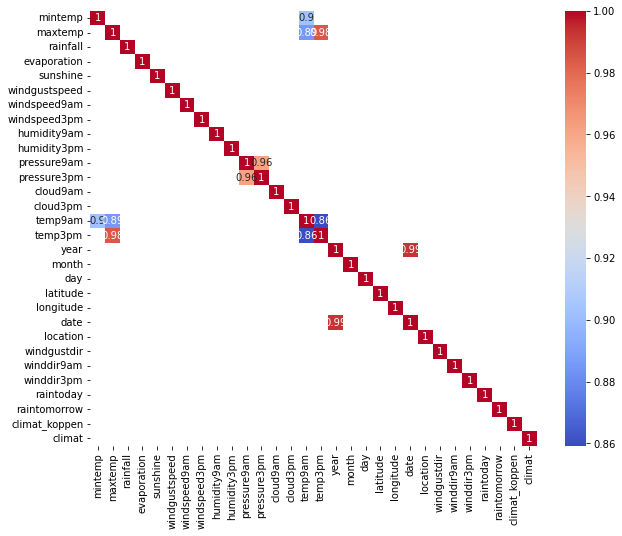

In [11]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Créer un masque pour masquer les corrélations inférieures à 0,75
mask = (corr_matrix < 0.75) & (corr_matrix > -0.75)

# Créer une nouvelle figure avec une taille de 10 x 8 pouces
plt.figure(figsize=(10, 8))

# Afficher la matrice de corrélation avec les valeurs de corrélation annotées et les valeurs de corrélation inférieures à 0,75 masquées
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')

# Afficher le graphique
plt.show()



In [12]:
features = df[["mintemp","maxtemp","sunshine","evaporation",
            "humidity3pm","humidity9am","pressure3pm", "pressure9am", "raintoday", "cloud3pm","cloud9am", "climat_koppen", "climat"]]

target = df["raintomorrow"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
from lazypredict.Supervised import LazyClassifier

In [15]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [12:16<00:00, 25.41s/it] 

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.63               0.51    None      0.71   
QuadraticDiscriminantAnalysis      0.82               0.51    None      0.82   
GaussianNB                         0.78               0.50    None      0.79   
ExtraTreesClassifier               0.85               0.50    None      0.84   
RandomForestClassifier             0.85               0.50    None      0.84   
XGBClassifier                      0.85               0.49    None      0.84   
LGBMClassifier                     0.85               0.49    None      0.84   
BernoulliNB                        0.77               0.49    None      0.78   
KNeighborsClassifier               0.83               0.49    None      0.82   
LinearDiscriminantAnalysis         0.83               0.48    None      0.82   
BaggingClassifier                  0.84 

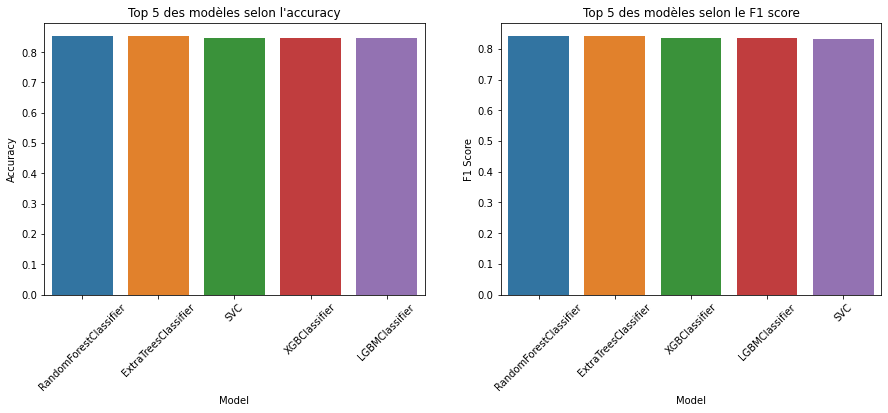

In [16]:
# Trier les modèles selon l'accuracy
top_accuracy = models.sort_values(by='Accuracy', ascending=False)[:5]

# Trier les modèles selon le F1 score
top_f1 = models.sort_values(by='F1 Score', ascending=False)[:5]

# Afficher les modèles dans un graphique en barres
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.barplot(x=top_accuracy.index, y=top_accuracy['Accuracy'], ax=ax[0])
sns.barplot(x=top_f1.index, y=top_f1['F1 Score'], ax=ax[1])
ax[0].set_xticklabels(top_accuracy.index, rotation=45)
ax[1].set_xticklabels(top_f1.index, rotation=45)
ax[0].set_title('Top 5 des modèles selon l\'accuracy')
ax[1].set_title('Top 5 des modèles selon le F1 score')
plt.show()

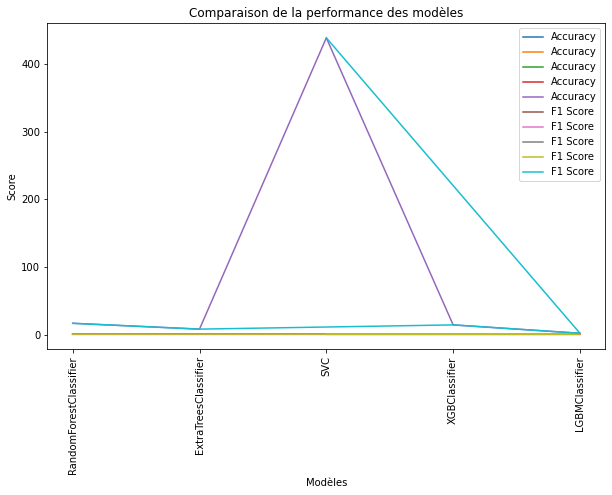

In [18]:
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(models.index, models['Accuracy'], label='Accuracy')
plt.plot(models.index, models['F1 Score'], label='F1 Score')

# Configuration du graphique
plt.title('Comparaison de la performance des modèles')
plt.xlabel('Modèles')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()

# Affichage du graphique
plt.show()
